**Task description: **

Given is a dataset.csv about fruit-data, implementing knn-method manually to classify fruit-data and using the built-in method KNeighborsClassifier to compare the results.

Data Preparation:

(a) & (b) Importing data and deleting duplicates

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as sklm

# import data from csv-dataset
data = pd.read_csv("dataset.csv").values

# print (len(data))  # 33

#loop to go compare values within data
for i in range (len(data)):
    for j in range (i+1,len(data)-1):
        #compare and delete the equal rows
        if (np.array_equal(data[i], data[j]) == True):            
            data = np.delete(data,j,0)

print("Values without doubled values:")
print(data)

# len(data) 30

33
Values without doubled values:
[['Yellow' 3.2 79 'Apple']
 ['Yellow' 3.1 69 'Lemon']
 ['Green' 4.3 133 'Pear']
 ['Yellow' 2.1 64 'Apple']
 ['Yellow' 2.6 58 'Lemon']
 ['Red' 3.7 101 'Apple']
 ['Yellow' 2.1 40 'Lemon']
 ['Green' 4.6 152 'Pear']
 ['Yellow' 2.3 60 'Lemon']
 ['Yellow' 4.2 105 'Pear']
 ['Yellow' 3.2 64 'Lemon']
 ['Yellow' 2.9 53 'Lemon']
 ['Yellow' 4.1 135 'Pear']
 ['Green' 3.1 85 'Apple']
 ['Yellow' 5.2 142 'Pear']
 ['Green' 3.6 173 'Pear']
 ['Green' 2.5 65 'Lemon']
 ['Red' 3.4 80 'Apple']
 ['Yellow' 0.0 137 'Pear']
 ['Green' 2.5 70 'Apple']
 ['Yellow' 3.0 98 'Apple']
 ['Green' 2.7 73 'Apple']
 ['Green' 4.5 110 'Pear']
 ['Yellow' 2.4 67 'Lemon']
 ['Green' 2.5 86 'Apple']
 ['Yellow' 4.1 0 'Lemon']
 ['Yellow' 4.1 75 'Apple']
 ['Yellow' 5.2 141 'Pear']
 ['Green' 2.4 68 'Lemon']
 ['Green' 4.2 126 'Pear']]


(c) Replacing missing numerical values

In [16]:
#checking for radius
sum = 0
n= 0
for i in range (len(data)):
    if (data[i][1] == 0):
        fruitclass = data[i][3]
                
        #loop for getting the mean value       
        for j in range(len(data)):
            if(data[j][3] == fruitclass):  #check index
                sum = sum + data[j][1]
                n = n + 1        
        mean = sum / (n-1)        
        data[i][1] = mean
        
# checking for weight
n=0
sum = 0
for i in range (len(data)):
    if (data[i][2] == 0):
        fruitclass = data[i][3]
        print(fruitclass)
        
        # loop for getting the mean value       
        for j in range (len(data)):
            if(data[j][3] == fruitclass):   #check for the index
                sum = sum + data[j][2]
                n = n + 1        
        mean  = sum / (n-1)        
        data[i][2] = mean
        
print(data)

[['Yellow' 3.2 79 'Apple']
 ['Yellow' 3.1 69 'Lemon']
 ['Green' 4.3 133 'Pear']
 ['Yellow' 2.1 64 'Apple']
 ['Yellow' 2.6 58 'Lemon']
 ['Red' 3.7 101 'Apple']
 ['Yellow' 2.1 40 'Lemon']
 ['Green' 4.6 152 'Pear']
 ['Yellow' 2.3 60 'Lemon']
 ['Yellow' 4.2 105 'Pear']
 ['Yellow' 3.2 64 'Lemon']
 ['Yellow' 2.9 53 'Lemon']
 ['Yellow' 4.1 135 'Pear']
 ['Green' 3.1 85 'Apple']
 ['Yellow' 5.2 142 'Pear']
 ['Green' 3.6 173 'Pear']
 ['Green' 2.5 65 'Lemon']
 ['Red' 3.4 80 'Apple']
 ['Yellow' 4.433333333333334 137 'Pear']
 ['Green' 2.5 70 'Apple']
 ['Yellow' 3.0 98 'Apple']
 ['Green' 2.7 73 'Apple']
 ['Green' 4.5 110 'Pear']
 ['Yellow' 2.4 67 'Lemon']
 ['Green' 2.5 86 'Apple']
 ['Yellow' 4.1 60.44444444444444 'Lemon']
 ['Yellow' 4.1 75 'Apple']
 ['Yellow' 5.2 141 'Pear']
 ['Green' 2.4 68 'Lemon']
 ['Green' 4.2 126 'Pear']]


In [17]:
# transforming nominal features into numbers by adding 3 extra columns for the colors
new_data = np.zeros((len(data),3), dtype=int)
new_data = np.append(data, new_data, axis = 1)

# assigning values of colors in numerical values
for i in range (len(new_data)):
    if(new_data[i][0] == "Yellow"):
        new_data[i][4] = 1
    elif (new_data[i][0] == "Green"):
        new_data[i][5] = 1
    elif (new_data[i][0] == "Red"):
        new_data[i][6] = 1
        
# removing column with color nominal feature
new_data = np.delete(new_data, 0, 1)
print(new_data)

[[3.2 79 'Apple' 1 0 0]
 [3.1 69 'Lemon' 1 0 0]
 [4.3 133 'Pear' 0 1 0]
 [2.1 64 'Apple' 1 0 0]
 [2.6 58 'Lemon' 1 0 0]
 [3.7 101 'Apple' 0 0 1]
 [2.1 40 'Lemon' 1 0 0]
 [4.6 152 'Pear' 0 1 0]
 [2.3 60 'Lemon' 1 0 0]
 [4.2 105 'Pear' 1 0 0]
 [3.2 64 'Lemon' 1 0 0]
 [2.9 53 'Lemon' 1 0 0]
 [4.1 135 'Pear' 1 0 0]
 [3.1 85 'Apple' 0 1 0]
 [5.2 142 'Pear' 1 0 0]
 [3.6 173 'Pear' 0 1 0]
 [2.5 65 'Lemon' 0 1 0]
 [3.4 80 'Apple' 0 0 1]
 [4.433333333333334 137 'Pear' 1 0 0]
 [2.5 70 'Apple' 0 1 0]
 [3.0 98 'Apple' 1 0 0]
 [2.7 73 'Apple' 0 1 0]
 [4.5 110 'Pear' 0 1 0]
 [2.4 67 'Lemon' 1 0 0]
 [2.5 86 'Apple' 0 1 0]
 [4.1 60.44444444444444 'Lemon' 1 0 0]
 [4.1 75 'Apple' 1 0 0]
 [5.2 141 'Pear' 1 0 0]
 [2.4 68 'Lemon' 0 1 0]
 [4.2 126 'Pear' 0 1 0]]


In [20]:
# Normalization by getting min and max values in radius and weight columns
radius = []
for i in range (len(new_data)):
    radius.append(new_data[i][0])

weight = []
for i in range (len(new_data)):
    weight.append(new_data[i][1])

# normalizing the observations of each feature
norm_data = np.zeros((len(data),2), dtype=int)
norm_data = np.append(new_data, norm_data, axis = 1)
for i in range (len(norm_data)):
    norm_data[i][6] = (norm_data[i][0] - min(radius))/ (max(radius)-min(radius))
    norm_data[i][7] = (norm_data[i][1] - min(weight))/ (max(weight)-min(weight))

print(new_data)
print("******************")
print(norm_data)

[[3.2 79 'Apple' 1 0 0]
 [3.1 69 'Lemon' 1 0 0]
 [4.3 133 'Pear' 0 1 0]
 [2.1 64 'Apple' 1 0 0]
 [2.6 58 'Lemon' 1 0 0]
 [3.7 101 'Apple' 0 0 1]
 [2.1 40 'Lemon' 1 0 0]
 [4.6 152 'Pear' 0 1 0]
 [2.3 60 'Lemon' 1 0 0]
 [4.2 105 'Pear' 1 0 0]
 [3.2 64 'Lemon' 1 0 0]
 [2.9 53 'Lemon' 1 0 0]
 [4.1 135 'Pear' 1 0 0]
 [3.1 85 'Apple' 0 1 0]
 [5.2 142 'Pear' 1 0 0]
 [3.6 173 'Pear' 0 1 0]
 [2.5 65 'Lemon' 0 1 0]
 [3.4 80 'Apple' 0 0 1]
 [4.433333333333334 137 'Pear' 1 0 0]
 [2.5 70 'Apple' 0 1 0]
 [3.0 98 'Apple' 1 0 0]
 [2.7 73 'Apple' 0 1 0]
 [4.5 110 'Pear' 0 1 0]
 [2.4 67 'Lemon' 1 0 0]
 [2.5 86 'Apple' 0 1 0]
 [4.1 60.44444444444444 'Lemon' 1 0 0]
 [4.1 75 'Apple' 1 0 0]
 [5.2 141 'Pear' 1 0 0]
 [2.4 68 'Lemon' 0 1 0]
 [4.2 126 'Pear' 0 1 0]]
******************
[[3.2 79 'Apple' 1 0 0 0.3548387096774194 0.2932330827067669]
 [3.1 69 'Lemon' 1 0 0 0.3225806451612903 0.21804511278195488]
 [4.3 133 'Pear' 0 1 0 0.7096774193548386 0.6992481203007519]
 [2.1 64 'Apple' 1 0 0 0.0 0.18045112781954

**2) Second Step: K-Nearest Neighbors Classification**

In [24]:
# Classification Data using K-NN
import math

inputdata = [('Green', [3.2, 95]), ('Yellow', [2.9, 60]), ('Green', [4.2, 90]), ('Red', [2.9, 65]), ('Yellow', [2.5, 64])]

inputdata_radius = [inputdata[i][1][0] for i in range(len(inputdata))]
inputdata_weight = [inputdata[i][1][1] for i in range(len(inputdata))]

norm_inputdata_radius = [(inputdata_radius[i] - min(inputdata_radius))/(max(inputdata_radius)-min(inputdata_radius)) 
                          for i in range(len(inputdata_radius))]
norm_inputdata_weight = [(inputdata_weight[i] - min(inputdata_weight))/(max(inputdata_weight)-min(inputdata_weight))
                          for i in range(len(inputdata_weight))]
 
# Calculate the Euclidean distance from every classifying data points to all training-data
e_dist_k1 = []
e_dist_k3 = []
tmp_re = []
for i in range (len(inputdata)):
    for j in range(len(norm_data)):
        tmp_re.append((math.sqrt((norm_data[j][6]-norm_inputdata_radius[i])**2 + 
                                 (norm_data[j][7]-norm_inputdata_weight[i])**2), 
                      norm_data[j][2]))        
    # with k = 1, choose the smallest distance 
    # with k = 3, choose the 3 smallest distances from the calculated list
    e_dist_k1.append((inputdata[i][0],sorted(tmp_re)[:1]))
    e_dist_k3.append((inputdata[i][0],sorted(tmp_re)[:3]))
    tmp_re = []

print ("\n....... Classification of the given data points ..... \n")
print ("With k = 1")
classified_k1 = [(e_dist_k1[i][0], e_dist_k1[i][1][0][1]) for i in range(len(e_dist_k1))]
print (classified_k1)

print ("\nWith k = 3")
    
classified_k3 = [((e_dist_k3[i][0], [e_dist_k3[i][1][j][1] for j in range(len(e_dist_k3[i][1]))])) 
                 for i in range(len(e_dist_k3))]
print ("",classified_k3,"\n")

# Count number of every sort of fruit in classified list
k3_result = []
for i in range(len(classified_k3)):
    if (classified_k3[i][1].count('Apple') > classified_k3[i][1].count('Lemon') and 
        classified_k3[i][1].count('Apple') > classified_k3[i][1].count('Pear')):        
        k3_result.append((classified_k3[i][0], 'Apple'))
    elif (classified_k3[i][1].count('Lemon') > classified_k3[i][1].count('Apple') and 
        classified_k3[i][1].count('Lemon') > classified_k3[i][1].count('Pear')):        
        k3_result.append((classified_k3[i][0], 'Lemon'))
    else:        
        k3_result.append((classified_k3[i][0], 'Pear'))

print (k3_result)
print ("\nDiscussion: With k=1 and k=3 deliver different results!")


....... Classification of the given data points ..... 

With k = 1
[('Green', 'Pear'), ('Yellow', 'Lemon'), ('Green', 'Pear'), ('Red', 'Lemon'), ('Yellow', 'Apple')]

With k = 3
 [('Green', ['Pear', 'Pear', 'Pear']), ('Yellow', ['Lemon', 'Lemon', 'Lemon']), ('Green', ['Pear', 'Pear', 'Pear']), ('Red', ['Lemon', 'Lemon', 'Apple']), ('Yellow', ['Apple', 'Lemon', 'Lemon'])] 

[('Green', 'Pear'), ('Yellow', 'Lemon'), ('Green', 'Pear'), ('Red', 'Lemon'), ('Yellow', 'Lemon')]

Discussion: With k=1 and k=3 deliver different results!


**Plotting: result from manual k-NN**

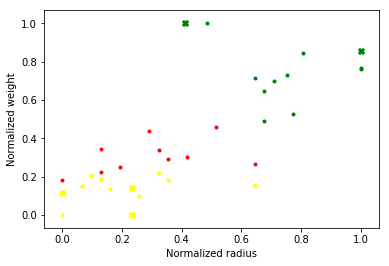

In [37]:
import matplotlib.pyplot as plt

plt.xlabel('Normalized radius')
plt.ylabel('Normalized weight')

x_radius_apple = [norm_data[i][6] for i in range(len(norm_data)) if norm_data[i][2] == 'Apple']
y_weight_apple = [norm_data[i][7] for i in range(len(norm_data)) if norm_data[i][2] == 'Apple']

x_radius_lemon = [norm_data[i][6] for i in range(len(norm_data)) if norm_data[i][2] == 'Lemon']
y_weight_lemon = [norm_data[i][7] for i in range(len(norm_data)) if norm_data[i][2] == 'Lemon']

x_radius_pear = [norm_data[i][6] for i in range(len(norm_data)) if norm_data[i][2] == 'Pear']
y_weight_pear = [norm_data[i][7] for i in range(len(norm_data)) if norm_data[i][2] == 'Pear']
    
plt.scatter(x_radius_apple, y_weight_apple, color='Red', marker='.', label='Original normed data Apple')
plt.scatter(x_radius_lemon, y_weight_lemon, color='Yellow', marker='.', label='Original normed data Yellow')
plt.scatter(x_radius_pear, y_weight_pear, color='Green', marker='.', label='Original normed data Pear')

for i in range(len(k3_result)):
    if (k3_result[i][1] == "Pear"):
        plt.scatter(norm_inputdata_radius[i], norm_inputdata_weight[i], color='Green', marker='X', 
                    label='classified observation')
    elif (k3_result[i][1] == "Apple"):
        plt.scatter(norm_inputdata_radius[i], norm_inputdata_weight[i], color='Red', marker='X', 
                    label='classified observation')
    elif (k3_result[i][1] == "Lemon"):
        plt.scatter(norm_inputdata_radius[i], norm_inputdata_weight[i], color='Yellow', marker='X', 
                    label='classified observation')
        
plt.show()
    